The zip file from kaggle contains three types of data sets (small, medium and large, with 5, 32 and 180 million transactions respectively). As we do not have that much computer power we decided to focus on the small one. 

In [8]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

In [9]:
# load CSV
#csv_file = "/Users/masha/Desktop/master/2_trim/networks/final project/data/IBM_data/HI-Small_Trans.csv"  # path
#parquet_file = "HI-Small_Trans.parquet"  # new file name

# read csv
#df = pd.read_csv(csv_file)

# dowload in parquet format
#df.to_parquet(parquet_file, engine="pyarrow", index=False)

#print(f"Archivo convertido y guardado como {parquet_file}")


In [10]:
df=pl.read_parquet('/Users/masha/Desktop/master/2_trim/networks/final project/networks_final_project-1/IBM_dataset/HI-Small_Trans.parquet')

In [11]:
df.head()

Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
str,i64,str,i64,str,f64,str,f64,str,str,i64
"""2022/09/01 00:20""",10,"""8000EBD30""",10,"""8000EBD30""",3697.34,"""US Dollar""",3697.34,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:20""",3208,"""8000F4580""",1,"""8000F5340""",0.01,"""US Dollar""",0.01,"""US Dollar""","""Cheque""",0
"""2022/09/01 00:00""",3209,"""8000F4670""",3209,"""8000F4670""",14675.57,"""US Dollar""",14675.57,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:02""",12,"""8000F5030""",12,"""8000F5030""",2806.97,"""US Dollar""",2806.97,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:06""",10,"""8000F5200""",10,"""8000F5200""",36682.97,"""US Dollar""",36682.97,"""US Dollar""","""Reinvestment""",0


In [12]:
# Convert the 'Timestamp' column to datetime format for time-based analysis
df = df.with_columns(
    pl.col('Timestamp').str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
)

In [13]:
def check_missing_values(df):
    missing = df.null_count()
    print("Missing values per column:")
    print(missing)

# Distribution of transaction amounts
def plot_transaction_amounts(df):
    plt.figure(figsize=(8, 5))

    amounts = df["Amount Paid"].to_numpy()
    log_amounts = np.log1p(amounts) 

    # Plot histogram
    sns.histplot(log_amounts, bins=50, kde=True, edgecolor='black',alpha=0.6)
    plt.xlabel("Log(Transaction Amount)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Transaction Amounts")
    plt.grid(True)
    plt.show()


# Currency usage distribution
def plot_currency_distribution(df):
    currency_counts = df["Payment Currency"].value_counts()
    
    col_names = currency_counts.columns
    currency_col = col_names[0]  
    count_col = col_names[1] 

    currencies = currency_counts[currency_col].to_list()
    counts = currency_counts[count_col].to_list()

    plt.figure(figsize=(8, 5))
    plt.bar(currencies, counts, color='royalblue', alpha=0.7)
    plt.xticks(rotation=45)
    plt.xlabel("Currency")
    plt.ylabel("Number of Transactions")
    plt.title("Distribution of Payment Currencies")
    plt.show()


# Payment format distribution
def plot_payment_format_distribution(df):
    format_counts = df["Payment Format"].value_counts()
    
    col_names = format_counts.columns
    format_col = col_names[0] 
    count_col = col_names[1]  
    formats = format_counts[format_col].to_list()
    counts = format_counts[count_col].to_list()

    plt.figure(figsize=(8, 5))
    plt.bar(formats, counts, color="dodgerblue", alpha=0.7)
    plt.xticks(rotation=45)
    plt.xlabel("Payment Format")
    plt.ylabel("Number of Transactions")
    plt.title("Distribution of Payment Formats")
    plt.show()


def plot_laundering_distribution(df):
    laundering_counts = df["Is Laundering"].value_counts()
    
    col_names = laundering_counts.columns
    label_col = col_names[0] 
    count_col = col_names[1]
    
    labels = ["Non-Laundering", "Laundering"]
    sizes = laundering_counts[count_col].to_list()

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["red","royalblue" ], startangle=140)
    plt.title("Proportion of Laundering Transactions")
    plt.show()


Missing values per column:
shape: (1, 11)
┌───────────┬───────────┬─────────┬─────────┬───┬────────┬──────────┬─────────┬───────────────┐
│ Timestamp ┆ From Bank ┆ Account ┆ To Bank ┆ … ┆ Amount ┆ Payment  ┆ Payment ┆ Is Laundering │
│ ---       ┆ ---       ┆ ---     ┆ ---     ┆   ┆ Paid   ┆ Currency ┆ Format  ┆ ---           │
│ u32       ┆ u32       ┆ u32     ┆ u32     ┆   ┆ ---    ┆ ---      ┆ ---     ┆ u32           │
│           ┆           ┆         ┆         ┆   ┆ u32    ┆ u32      ┆ u32     ┆               │
╞═══════════╪═══════════╪═════════╪═════════╪═══╪════════╪══════════╪═════════╪═══════════════╡
│ 0         ┆ 0         ┆ 0       ┆ 0       ┆ … ┆ 0      ┆ 0        ┆ 0       ┆ 0             │
└───────────┴───────────┴─────────┴─────────┴───┴────────┴──────────┴─────────┴───────────────┘


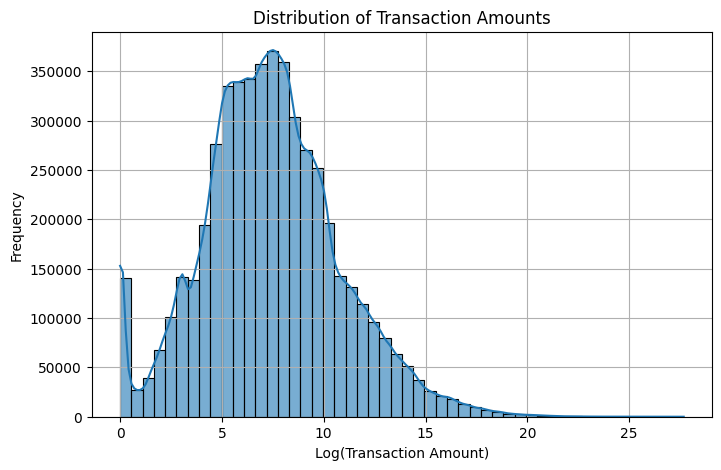

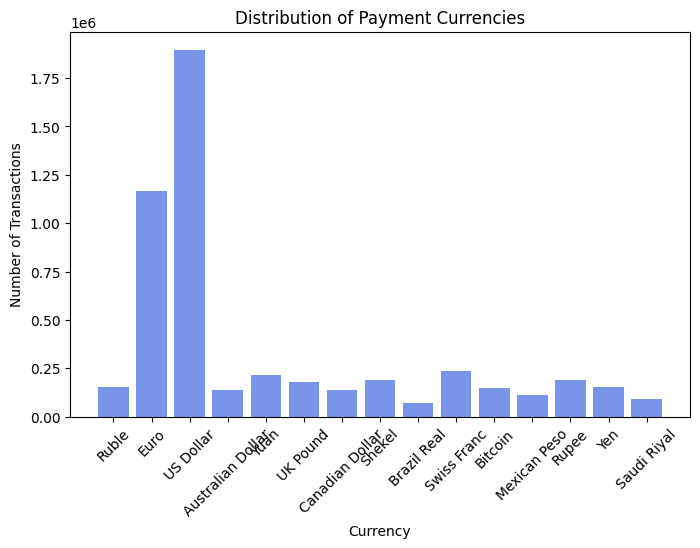

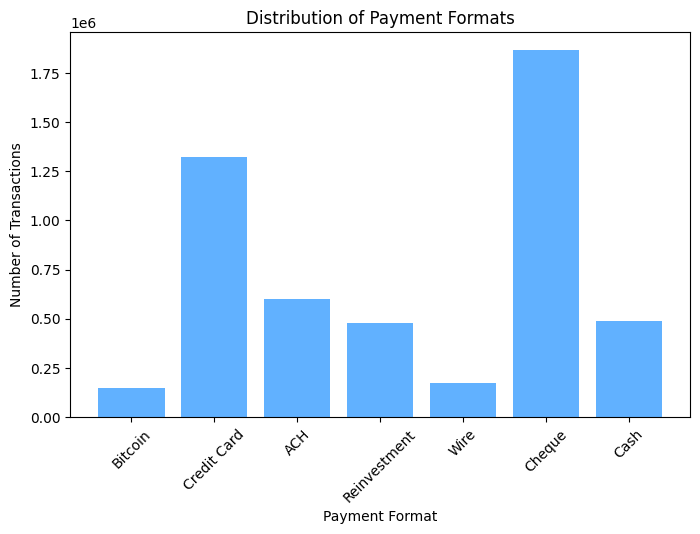

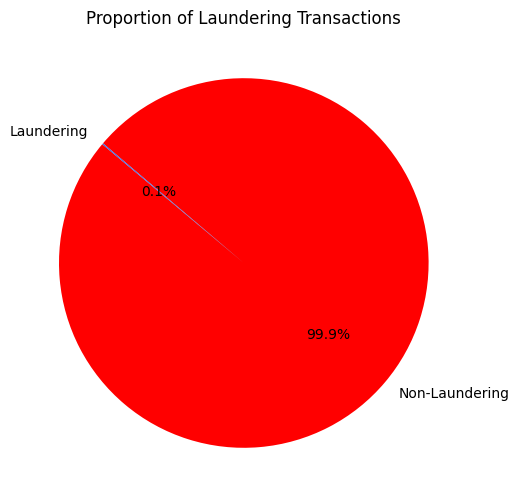

In [14]:
# EDA functions
check_missing_values(df)
plot_transaction_amounts(df)
plot_currency_distribution(df)
plot_payment_format_distribution(df)
plot_laundering_distribution(df)

ACH stands for Automated Clearing House. It is an electronic network used for processing transactions in the United States.

In [15]:
def plot_transaction_volume_over_time(df):
    # Extract only the date
    df = df.with_columns(pl.col("Timestamp").dt.date().alias("Date"))

    # Group by date and count transactions per day
    transactions_per_day = df.group_by("Date").agg(pl.count().alias("Transaction Count")).sort("Date")

    plt.figure(figsize=(10, 5))
    plt.plot(transactions_per_day["Date"], transactions_per_day["Transaction Count"], marker="o", linestyle="-", color="teal")
    plt.xlabel("Date")
    plt.ylabel("Number of Transactions")
    plt.title("Transaction Volume Over Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


def plot_transaction_amounts_per_currency(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["Payment Currency"], y=np.log1p(df["Amount Paid"]), palette="pastel")
    plt.xlabel("Payment Currency")
    plt.ylabel("Log(Amount Paid)")
    plt.title("Transaction Amounts by Currency")
    plt.xticks(rotation=45)
    plt.show()

def plot_top_suspicious_accounts(df, top_n=10):
    sender_counts = df["Account"].value_counts().head(top_n)
    
    plt.figure(figsize=(8, 5))
    plt.barh(sender_counts["Account"].to_list(), sender_counts["count"].to_list(), color="lightcoral")
    plt.xlabel("Number of Transactions")
    plt.ylabel("Account")
    plt.title(f"Top {top_n} Most Active Sending Accounts")
    plt.gca().invert_yaxis()
    plt.show()

def plot_unique_counterparties(df, top_n=10):
    # Count unique recipients per sender account
    unique_recipients = df.group_by("Account").agg(pl.col("Account.1").n_unique().alias("Unique Recipients"))

    # Get the top accounts with the most unique recipients
    top_senders = unique_recipients.sort("Unique Recipients", descending=True).head(top_n)

    plt.figure(figsize=(8, 5))
    plt.barh(top_senders["Account"].to_list(), top_senders["Unique Recipients"].to_list(), color="mediumslateblue")
    plt.xlabel("Unique Counterparties")
    plt.ylabel("Account")
    plt.title(f"Top {top_n} Accounts by Number of Unique Recipients")
    plt.gca().invert_yaxis()
    plt.show()


def compare_laundering_vs_non(df):
    # Convert "Is Laundering" from numeric to categorical labels
    df = df.with_columns(
        pl.when(pl.col("Is Laundering") == 1)
        .then(pl.lit("Laundering"))
        .otherwise(pl.lit("Non-Laundering"))
        .alias("Laundering Label")
    )

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["Laundering Label"], y=np.log1p(df["Amount Paid"]), palette=["lightblue", "salmon"])
    plt.xlabel("Transaction Type")
    plt.ylabel("Log(Amount Paid)")
    plt.title("Comparison of Laundering vs. Non-Laundering Transaction Amounts")
    plt.show()




/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_63656/827123479.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  transactions_per_day = df.group_by("Date").agg(pl.count().alias("Transaction Count")).sort("Date")


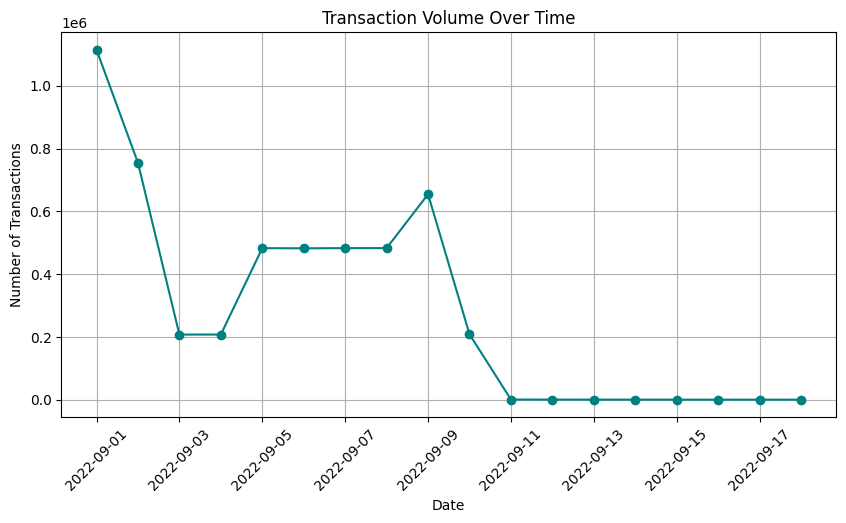

/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_63656/827123479.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Payment Currency"], y=np.log1p(df["Amount Paid"]), palette="pastel")


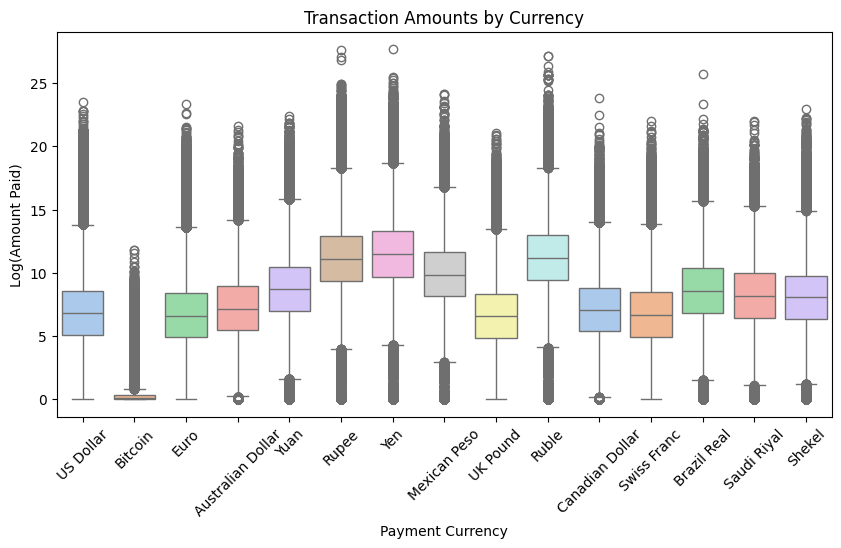

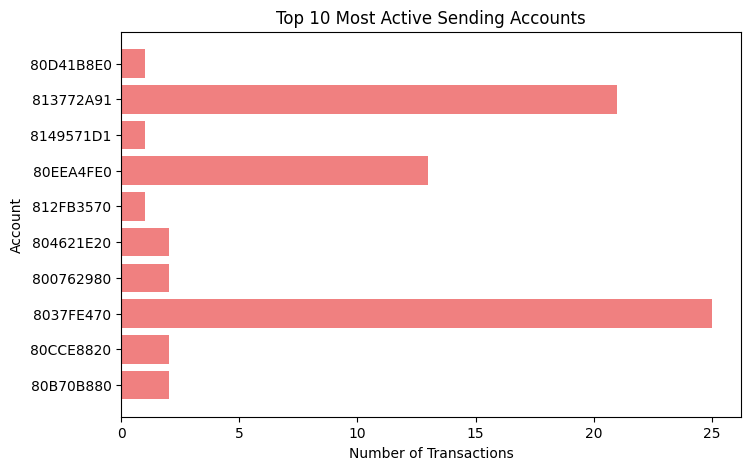

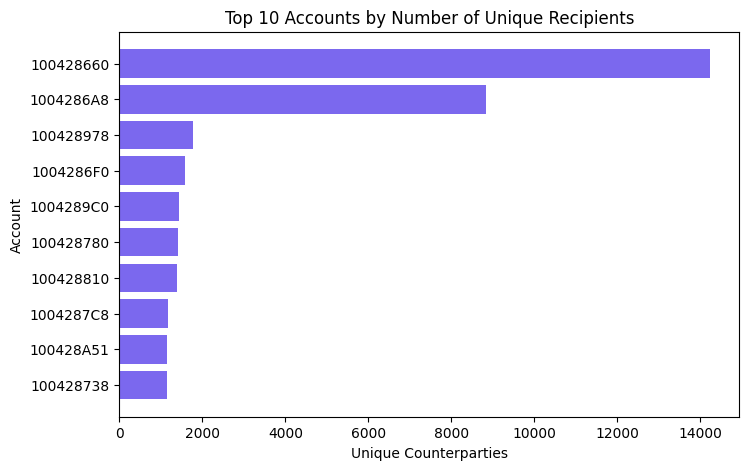

/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_63656/827123479.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Laundering Label"], y=np.log1p(df["Amount Paid"]), palette=["lightblue", "salmon"])


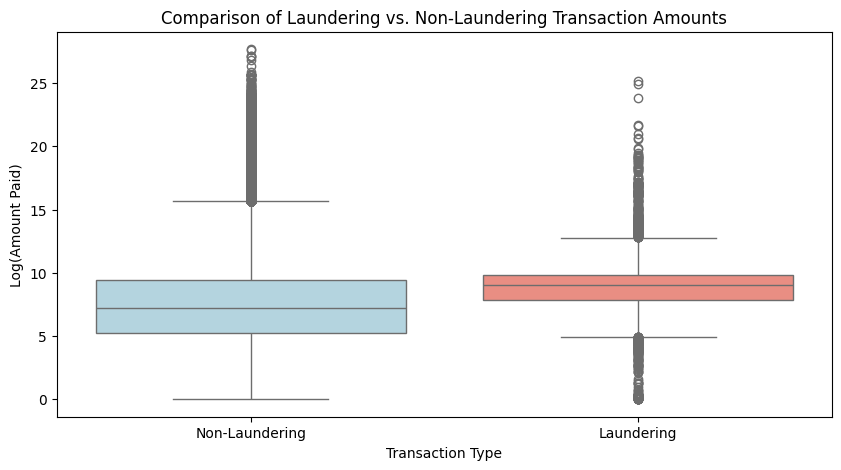

In [16]:
plot_transaction_volume_over_time(df)
plot_transaction_amounts_per_currency(df)
plot_top_suspicious_accounts(df, top_n=10)
plot_unique_counterparties(df, top_n=10)
compare_laundering_vs_non(df)

In [17]:
# Això és només per comparar amb els gràfics si realment el volum de les transaccions te a veure amb el money laundering. 
# Per el number of unique recipients si que podem detectar alguna cosa
print(df.filter(pl.col("Is Laundering") == 1))

shape: (5_177, 11)
┌────────────┬───────────┬───────────┬─────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Timestamp  ┆ From Bank ┆ Account   ┆ To Bank ┆ … ┆ Amount    ┆ Payment   ┆ Payment   ┆ Is Launde │
│ ---        ┆ ---       ┆ ---       ┆ ---     ┆   ┆ Paid      ┆ Currency  ┆ Format    ┆ ring      │
│ datetime[μ ┆ i64       ┆ str       ┆ i64     ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ s]         ┆           ┆           ┆         ┆   ┆ f64       ┆ str       ┆ str       ┆ i64       │
╞════════════╪═══════════╪═══════════╪═════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2022-09-01 ┆ 70        ┆ 100428660 ┆ 1124    ┆ … ┆ 389769.39 ┆ US Dollar ┆ Cheque    ┆ 1         │
│ 00:21:00   ┆           ┆           ┆         ┆   ┆           ┆           ┆           ┆           │
│ 2022-09-01 ┆ 70        ┆ 100428660 ┆ 11474   ┆ … ┆ 29024.33  ┆ US Dollar ┆ Credit    ┆ 1         │
│ 00:03:00   ┆           ┆           ┆         ┆   ┆           ┆        

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network_of_top_accounts(df, top_n=10):
    # Step 1: Identify Top Accounts by Unique Counterparties
    unique_recipients = df.group_by("Account").agg(pl.col("Account.1").n_unique().alias("Unique Recipients"))
    top_accounts = unique_recipients.sort("Unique Recipients", descending=True).head(top_n)["Account"].to_list()

    # Step 2: Filter transactions where these accounts are either senders OR receivers
    filtered_df = df.filter(pl.col("Account").is_in(top_accounts) | pl.col("Account.1").is_in(top_accounts))

    # Step 3: Create the Graph
    G = nx.DiGraph()
    for row in filtered_df.iter_rows(named=True):
        sender = row["Account"]
        receiver = row["Account.1"]
        amount = row["Amount Paid"]

        # Edge color: Highlight if transaction is laundering
        color = "red" if row["Is Laundering"] == 1 else "steelblue"

        G.add_edge(sender, receiver, weight=amount, color=color)

    # Step 4: Plot the Network
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
    edge_colors = [G[u][v]["color"] for u, v in G.edges()]
    edge_widths = [G[u][v]["weight"] / max(df["Amount Paid"].to_list()) * 5 for u, v in G.edges()]  # Scale weights

    nx.draw(G, pos, with_labels=False, node_size=30, edge_color=edge_colors, width=edge_widths, alpha=0.7)
    
    plt.title(f"Full Transaction Network of Top {top_n} Most Connected Accounts")
    plt.show()


In [ ]:
plot_network_of_top_accounts(df, top_n=10)